<a href="https://colab.research.google.com/github/moriartyAF/Clone_Test/blob/main/Module11_Assessing_market_Opps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install fbprophet
except:
  print("Error installing facebook prophet")
finally:
  clear_output()
  print('Facebook Prophet was successfully installed')

Facebook Prophet was successfully installed


In [2]:
import pandas as pd
import datetime as dt
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the data from the scarf-google-trends-data.csv file into a Pandas DataFrame
from google.colab import files
uploaded = files.upload()


Saving scarf-google-trends-data.csv to scarf-google-trends-data.csv


In [4]:
df_alpaca = pd.read_csv("scarf-google-trends-data.csv")

# Review the DataFrame
df_alpaca.head()

,week,canada,uruguay
0,11/8/15,74,17
1,11/15/15,81,17
2,11/22/15,94,17
3,11/29/15,92,0
4,12/6/15,87,18


In [7]:
# Create a DataFrame for Canada to include the week and canada columns
df_canada = df_alpaca[["week","canada"]]

# Rename the columns to the Prophet model syntax 
df_canada = df_canada.rename(columns = {"week":"ds","canada":"y"})

# Review the Canada DataFrame
df_canada

,ds,y
0,11/8/15,74
1,11/15/15,81
2,11/22/15,94
3,11/29/15,92
4,12/6/15,87
...,...,...
255,9/27/20,33
256,10/4/20,38
257,10/11/20,43
258,10/18/20,42


In [8]:
# # Create a DataFrame for Uruguay to include the week and uruguay columns
df_uruguay = df_alpaca[["week","uruguay"]]

# Rename the columns to the Prophet model syntax 
df_uruguay = df_uruguay.rename(columns={"week":"ds","uruguay":"y"})

# Review the Uruguay DataFrame
df_uruguay


,ds,y
0,11/8/15,17
1,11/15/15,17
2,11/22/15,17
3,11/29/15,0
4,12/6/15,18
...,...,...
255,9/27/20,14
256,10/4/20,15
257,10/11/20,15
258,10/18/20,14


In [9]:
# Create a Prophet model for Canada
model_canada = Prophet()

In [11]:
# Create a Prophet model for Uruguay
model_uruguay = Prophet()


In [12]:
# Fit the Canada Prophet model
model_canada.fit(df_canada)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
# Fit the Uruguay Prophet model
model_uruguay.fit(df_uruguay)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
# Forecast one year of weekly future trends data for Canada 
future_canada = model_canada.make_future_dataframe(periods=52,freq="W")
# Display the last five rows of the future_canada DataFrame
future_canada.tail()

,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


In [16]:
# Forecast one year of weekly future trends data for Uruguay 
future_uruguay = model_uruguay.make_future_dataframe(periods=52,freq="W")

# Display the last five rows of the future_uruguay DataFrame
future_uruguay.tail()

,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


In [17]:
# Make predictions for Canada using the future_canada DataFrame
forecast_canada = model_canada.predict(future_canada)

# Display the first five rows of the forecast_canada DataFrame
forecast_canada.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,46.046115,67.918139,81.639741,46.046115,46.046115,28.544840,28.544840,28.544840,28.544840,28.544840,28.544840,0.0,0.0,0.0,74.590955
1,2015-11-15,45.949933,71.913099,85.156233,45.949933,45.949933,32.937274,32.937274,32.937274,32.937274,32.937274,32.937274,0.0,0.0,0.0,78.887207
2,2015-11-22,45.853751,75.194967,87.687250,45.853751,45.853751,36.023778,36.023778,36.023778,36.023778,36.023778,36.023778,0.0,0.0,0.0,81.877529
3,2015-11-29,45.757569,78.140020,90.818385,45.757569,45.757569,38.865473,38.865473,38.865473,38.865473,38.865473,38.865473,0.0,0.0,0.0,84.623042
4,2015-12-06,45.661387,81.085110,93.642169,45.661387,45.661387,41.701658,41.701658,41.701658,41.701658,41.701658,41.701658,0.0,0.0,0.0,87.363045


In [18]:
# Make predictions for Uruguay using the future_uruguay DataFrame
forecast_uruguay = model_uruguay.predict(future_uruguay)

# Display the first five rows of the forecast_uruguay DataFrame
forecast_uruguay

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,33.346622,9.921211,44.542213,33.346622,33.346622,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,0.0,0.0,0.0,26.263750
1,2015-11-15,33.301449,5.863938,39.814367,33.301449,33.301449,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,0.0,0.0,0.0,22.953485
2,2015-11-22,33.256275,-0.594015,34.071435,33.256275,33.256275,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,0.0,0.0,0.0,17.360902
3,2015-11-29,33.211102,-2.094296,30.137190,33.211102,33.211102,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,0.0,0.0,0.0,13.733966
4,2015-12-06,33.165929,-2.276922,31.870255,33.165929,33.165929,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,0.0,0.0,0.0,14.693202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2021-09-26,19.491190,-9.048338,24.297213,19.490927,19.491513,-11.162460,-11.162460,-11.162460,-11.162460,-11.162460,-11.162460,0.0,0.0,0.0,8.328730
308,2021-10-03,19.446097,-4.804359,28.586854,19.445827,19.446431,-7.660286,-7.660286,-7.660286,-7.660286,-7.660286,-7.660286,0.0,0.0,0.0,11.785812
309,2021-10-10,19.401005,-3.495548,30.070701,19.400729,19.401349,-6.828026,-6.828026,-6.828026,-6.828026,-6.828026,-6.828026,0.0,0.0,0.0,12.572979
310,2021-10-17,19.355913,-5.328800,29.764918,19.355627,19.356268,-8.046626,-8.046626,-8.046626,-8.046626,-8.046626,-8.046626,0.0,0.0,0.0,11.309287


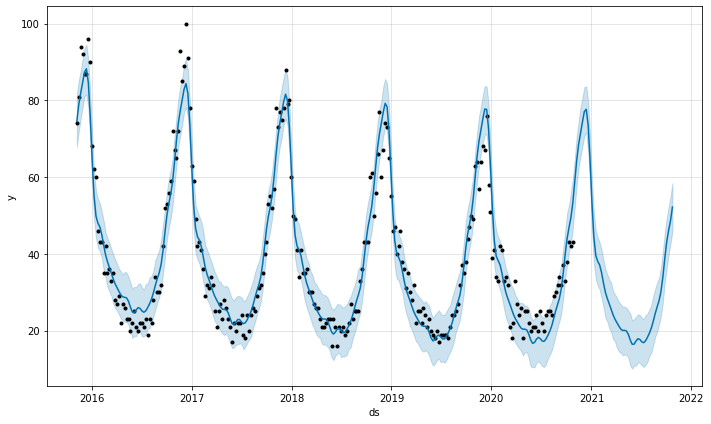

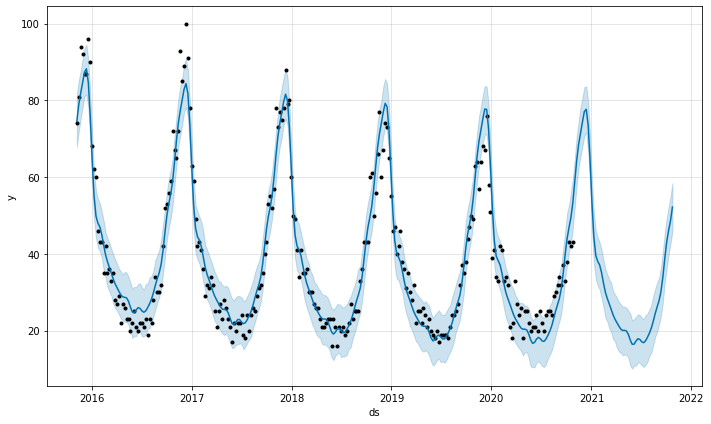

In [19]:
# Plot the Prophet predictions for Canada 
model_canada.plot(forecast_canada)

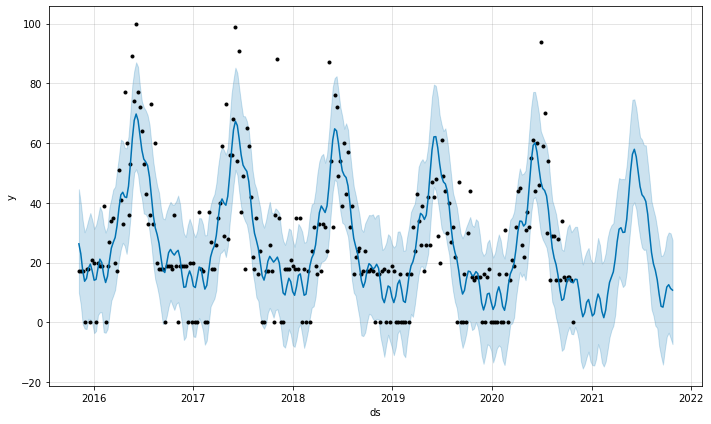

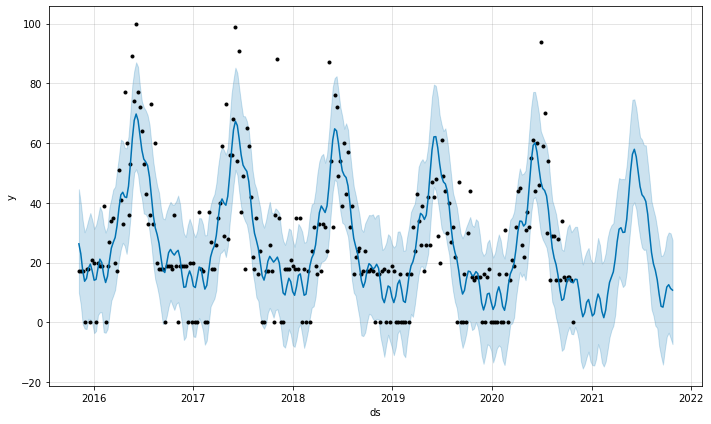

In [20]:
model_uruguay.plot(forecast_uruguay)

In [21]:
# Set the index in the forecast_canada DataFrame to the ds datetime column 
forecast_canada = forecast_canada.set_index("ds")

# Display the forecast_canada DataFrame
forecast_canada


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-11-08,46.046115,67.918139,81.639741,46.046115,46.046115,28.544840,28.544840,28.544840,28.544840,28.544840,28.544840,0.0,0.0,0.0,74.590955
2015-11-15,45.949933,71.913099,85.156233,45.949933,45.949933,32.937274,32.937274,32.937274,32.937274,32.937274,32.937274,0.0,0.0,0.0,78.887207
2015-11-22,45.853751,75.194967,87.687250,45.853751,45.853751,36.023778,36.023778,36.023778,36.023778,36.023778,36.023778,0.0,0.0,0.0,81.877529
2015-11-29,45.757569,78.140020,90.818385,45.757569,45.757569,38.865473,38.865473,38.865473,38.865473,38.865473,38.865473,0.0,0.0,0.0,84.623042
2015-12-06,45.661387,81.085110,93.642169,45.661387,45.661387,41.701658,41.701658,41.701658,41.701658,41.701658,41.701658,0.0,0.0,0.0,87.363045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,34.893348,32.561745,45.420561,34.520066,35.204626,3.853331,3.853331,3.853331,3.853331,3.853331,3.853331,0.0,0.0,0.0,38.746679
2021-10-03,34.887326,36.259451,49.396570,34.505920,35.210840,8.183883,8.183883,8.183883,8.183883,8.183883,8.183883,0.0,0.0,0.0,43.071209
2021-10-10,34.881304,39.715610,52.249379,34.488149,35.219930,11.226325,11.226325,11.226325,11.226325,11.226325,11.226325,0.0,0.0,0.0,46.107629


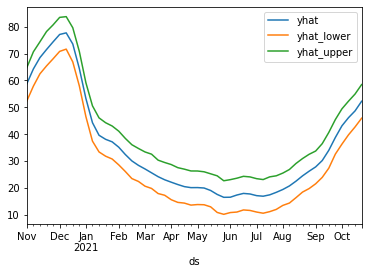

In [23]:
# Plot predictions for our forecast_canada DataFrame for the 52 week period 
forecast_canada[["yhat","yhat_lower","yhat_upper"]].iloc[-52:,:].plot()

In [24]:
# Set the index in the forecast_uruguay DataFrame to the ds datetime column 
forecast_uruguay = forecast_uruguay.set_index("ds")

# Display the forecast_uruguay DataFrame
forecast_uruguay

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-11-08,33.346622,9.921211,44.542213,33.346622,33.346622,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,-7.082872,0.0,0.0,0.0,26.263750
2015-11-15,33.301449,5.863938,39.814367,33.301449,33.301449,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,-10.347964,0.0,0.0,0.0,22.953485
2015-11-22,33.256275,-0.594015,34.071435,33.256275,33.256275,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,-15.895374,0.0,0.0,0.0,17.360902
2015-11-29,33.211102,-2.094296,30.137190,33.211102,33.211102,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,-19.477136,0.0,0.0,0.0,13.733966
2015-12-06,33.165929,-2.276922,31.870255,33.165929,33.165929,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,-18.472727,0.0,0.0,0.0,14.693202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,19.491190,-9.048338,24.297213,19.490927,19.491513,-11.162460,-11.162460,-11.162460,-11.162460,-11.162460,-11.162460,0.0,0.0,0.0,8.328730
2021-10-03,19.446097,-4.804359,28.586854,19.445827,19.446431,-7.660286,-7.660286,-7.660286,-7.660286,-7.660286,-7.660286,0.0,0.0,0.0,11.785812
2021-10-10,19.401005,-3.495548,30.070701,19.400729,19.401349,-6.828026,-6.828026,-6.828026,-6.828026,-6.828026,-6.828026,0.0,0.0,0.0,12.572979


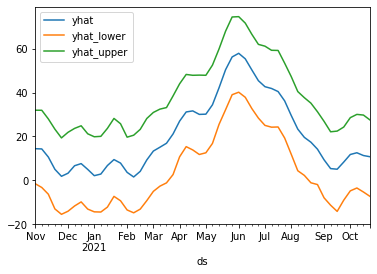

In [25]:
# Plot predictions for our forecast_uruguay DataFrame for the 52 week period 
forecast_uruguay[["yhat","yhat_lower","yhat_upper"]].iloc[-52:,:].plot()

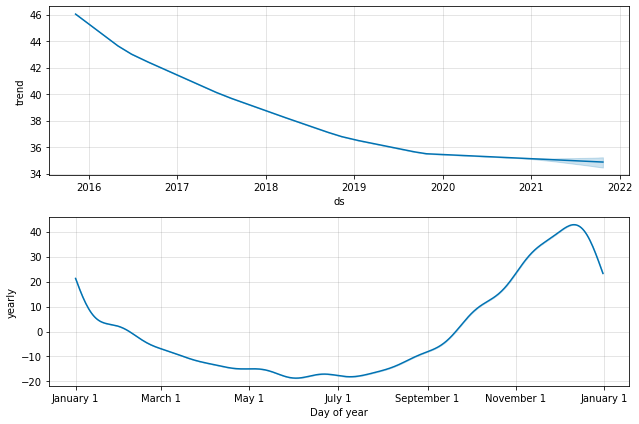

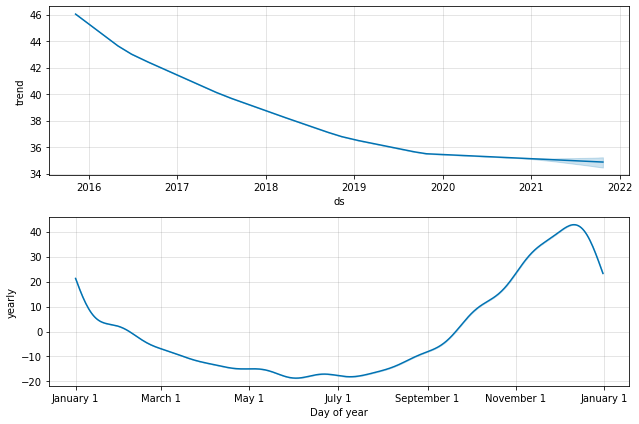

In [28]:
# Reset the index in the forecast_canada DataFrame
forecast_canada = forecast_canada.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame
model_canada.plot_components(forecast_canada)

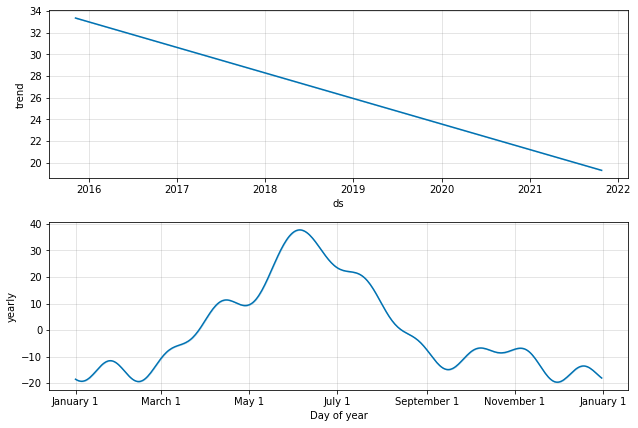

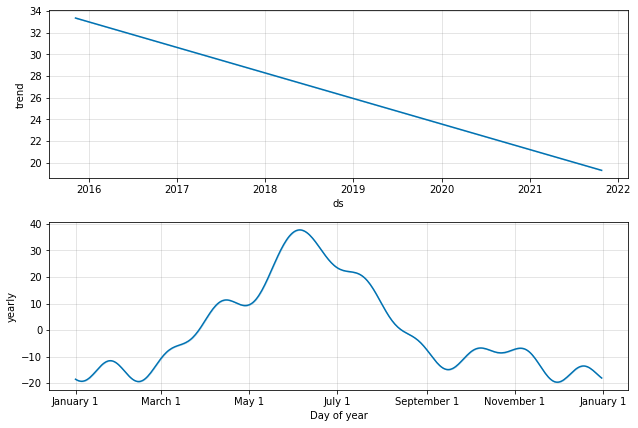

In [29]:
# Reset the index in the forecast_uruguay DataFrame
forecast_uruguay = forecast_uruguay.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_uruguay DataFrame
model_uruguay.plot_components(forecast_uruguay)
